In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
import re
import nltk

from collections import Counter

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams

# Carga de archivos de datos

### Debido a que son archivos de texto que no se separan por columnas, no lo abrimos con pandas para que no sea un dataset sino que solo leemos todo el archivo, linea por linea.

In [3]:
f_blogs = open('en_US/en_US.blogs.txt', 'r')
blogs = f_blogs.readlines()
f_blogs.close()
# blogs = word_tokenize(blogs)

f_news = open('en_US/en_US.news.txt', 'r')
news = f_news.readlines()
f_news.close()
# news = word_tokenize(news)

f_twitter = open('en_US/en_US.twitter.txt', 'r')
tweets = f_twitter.readlines()
f_twitter.close()
# tweets = word_tokenize(tweets)

# Limpieza de datos

### Pasamos todo el texto a minusculas por medio de un for en donde se pasa a minuscula cada palabra en el archivo de texto.

In [4]:
blogs = [word.lower() for word in blogs]
news = [word.lower() for word in news]
tweets = [word.lower() for word in tweets]

### Eliminamos los caractéres especiales por medio de expresiones regulares con la libreria re de python. Con esta expresión regular quitamos todo aquello que no sea letras o numeros de manera que eliminamos tambien los signos de puntuación.

In [5]:
special_characters = re.compile("[^A-Za-z0-9]+")

In [6]:
blogs = [special_characters.sub(r' ', word) for word in blogs]
news = [special_characters.sub(r' ', word) for word in news]
tweets = [special_characters.sub(r' ', word) for word in tweets]

### Eliminamos las url, tambien con expresiones regulares verificando que el inicio sea con http o https.

In [7]:
url_pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))', flags=re.MULTILINE)

In [8]:
blogs = [url_pattern.sub(r' ', word) for word in blogs]
news = [url_pattern.sub(r' ', word) for word in news]
tweets = [url_pattern.sub(r' ', word) for word in tweets]

### Eliminamos los caracteres especiales por medio de una expresión regular (con ayuda de la libreria que tra python de las expresiones regulares y un for para validar cada palabra. 
### Lo eliminamos por medio de los patterns de emojis (u"\U0001F600-\U0001F64F), simbolos (u"\U0001F300-\U0001F5FF), simbolos de mapa y transporte (u"\U0001F680-\U0001F6FF"), y banderas (u"\U0001F1E0-\U0001F1FF")

In [9]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)

In [10]:
blogs = [emoji_pattern.sub(r' ', word) for word in blogs]
news = [emoji_pattern.sub(r' ', word) for word in news]
tweets = [emoji_pattern.sub(r' ', word) for word in tweets]

### Eliminamos los signos de puntuación por medio de isalpha.

In [11]:
blogs = word_tokenize(str(blogs))
news = word_tokenize(str(news))
tweets = word_tokenize(str(tweets))

In [12]:
blogs = [word for word in blogs if word.isalpha()]
news = [word for word in news if word.isalpha()]
tweets = [word for word in tweets if word.isalpha()]

### Eliminamos las stopword con ayuda de la libreria de NLTK y su modulo de corpus

In [13]:
try:
    stopwords = set(stopwords.words('english'))
except:
    stopwords = stopwords

In [14]:
blogs = [word for word in blogs if not word in stopwords]
news = [word for word in news if not word in stopwords]
tweets = [word for word in tweets if not word in stopwords]

# Exploración

In [15]:
blogs[:10]

['years',
 'thereafter',
 'oil',
 'fields',
 'platforms',
 'named',
 'pagan',
 'gods',
 'love',
 'mr']

In [16]:
news[:10]

['home',
 'alone',
 'apparently',
 'st',
 'louis',
 'plant',
 'close',
 'would',
 'die',
 'old']

In [17]:
tweets[:10]

['btw', 'thanks', 'rt', 'gon', 'na', 'dc', 'anytime', 'soon', 'love', 'see']

### Para sacar la frecuencia de las palabras de cada archivo utilizamos la libreria de collections, el modulo de counter.

In [18]:
frecuency_blogs = Counter(blogs)
frecuency_news = Counter(news)
frecuency_tweets = Counter(tweets)

In [19]:
frecuency_blogs

Counter({'years': 33132,
         'thereafter': 211,
         'oil': 5461,
         'fields': 1115,
         'platforms': 261,
         'named': 3061,
         'pagan': 257,
         'gods': 987,
         'love': 44710,
         'mr': 6282,
         'brown': 4712,
         'awesome': 4691,
         'kids': 14289,
         'holding': 2844,
         'fort': 572,
         'work': 37421,
         'later': 12207,
         'usual': 2957,
         'busy': 4856,
         'together': 15935,
         'playing': 6387,
         'skylander': 1,
         'xbox': 149,
         'kyan': 29,
         'cashed': 30,
         'piggy': 138,
         'bank': 2567,
         'wanted': 15670,
         'game': 9328,
         'bad': 12619,
         'used': 23227,
         'gift': 4731,
         'card': 10431,
         'birthday': 5352,
         'saving': 1271,
         'money': 12069,
         'get': 70743,
         'never': 31056,
         'taps': 170,
         'thing': 24006,
         'either': 9353,
         '

### Obtenemos las palabras que mas se repite en cada archivo por medio del modulo de most_common de collections. Realmente es la misma funcion que el counter.

In [20]:
common_blogs = frecuency_blogs.most_common(10)
common_news = frecuency_news.most_common(10)
common_tweets = frecuency_tweets.most_common(10)

In [21]:
common_blogs

[('one', 124313),
 ('like', 99224),
 ('time', 90527),
 ('would', 82002),
 ('get', 70743),
 ('know', 60512),
 ('people', 60478),
 ('new', 54251),
 ('also', 53939),
 ('day', 52327)]

### Generamos la nube de palabras por medio de la libreria de wordcloud. La graficamos por medio de la frecuencia que optuvimos anteriormente.

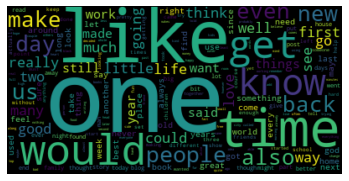

In [22]:
plt.axis("off")
plt.imshow(WordCloud().generate_from_frequencies(frecuency_blogs), interpolation="bilinear")

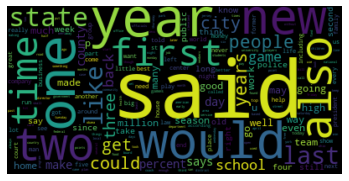

In [23]:
plt.axis("off")
plt.imshow(WordCloud().generate_from_frequencies(frecuency_news), interpolation="bilinear")

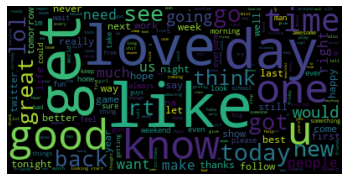

In [24]:
plt.axis("off")
plt.imshow(WordCloud().generate_from_frequencies(frecuency_tweets), interpolation="bilinear")

### Graficamos por medio de un histograma las palabras que más se repiten

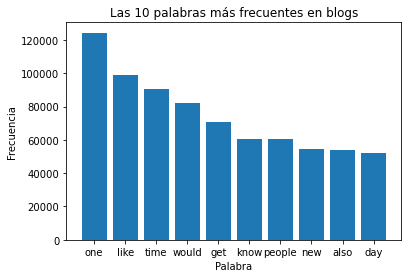

In [25]:
words = [word for word, _ in common_blogs]
counts = [counts for _, counts in common_blogs]

plt.bar(words, counts)
plt.title("Las 10 palabras más frecuentes en blogs")
plt.ylabel("Frecuencia")
plt.xlabel("Palabra")
plt.show()

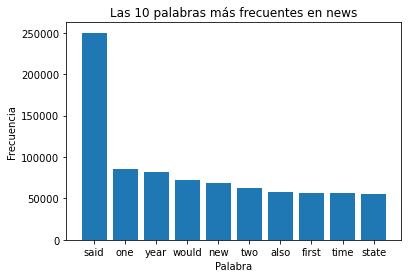

In [26]:
words = [word for word, _ in common_news]
counts = [counts for _, counts in common_news]

plt.bar(words, counts)
plt.title("Las 10 palabras más frecuentes en news")
plt.ylabel("Frecuencia")
plt.xlabel("Palabra")
plt.show()

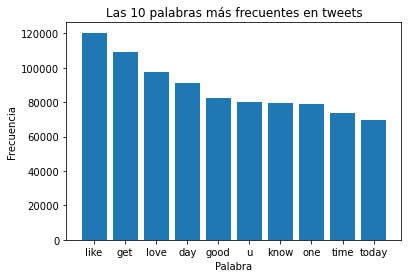

In [27]:
words = [word for word, _ in common_tweets]
counts = [counts for _, counts in common_tweets]

plt.bar(words, counts)
plt.title("Las 10 palabras más frecuentes en tweets")
plt.ylabel("Frecuencia")
plt.xlabel("Palabra")
plt.show()

### Obtenemos las palabras mas comunes de las mas comunes de los 3 archivos para saber cuales son las palabras (Comunes) que tienen presencia en todos los archivos

In [28]:
commons = common_blogs + common_news + common_tweets
words = [word for word, _ in commons]

In [29]:
print([item for item, count in Counter(words).items() if count > 1])

['one', 'like', 'time', 'would', 'get', 'know', 'new', 'also', 'day']


### Podemos observar que las palabras mas comunes de los tres archivos son palabras que evidentemente son muy dificiles de sustituir o evadir en el idioma inglés o bien se de uso muy frecuente en el modo de hablar como "also", "like".

# Muestra de archivos

### Obtenemos una muestra de los tres archivos y lo unimos en uno solo. La muestra obtenida lo hacemos aleatoriamente y obtenemos el 5% de cada archivo.

In [30]:
sample_blogs = random.sample(blogs, int(len(blogs)*0.05))
sample_news = random.sample(news, int(len(news)*0.05))
sample_tweets = random.sample(tweets, int(len(tweets)*0.05))

sample2 = blogs + news + tweets

In [31]:
sample = sample_blogs + sample_news + sample_tweets

In [32]:
len(sample)

2644893

# Modelo N-gram

### Calculamos los 2-grams y 3-grams utilizando unicamente la función que provee nltk

In [33]:
bigrams = list(ngrams(sample, n=2))
bigrams

[('book', 'exaggerated'),
 ('exaggerated', 'closest'),
 ('closest', 'words'),
 ('words', 'kindly'),
 ('kindly', 'brothers'),
 ('brothers', 'would'),
 ('would', 'reflection'),
 ('reflection', 'capable'),
 ('capable', 'respondent'),
 ('respondent', 'bad'),
 ('bad', 'runs'),
 ('runs', 'collection'),
 ('collection', 'times'),
 ('times', 'national'),
 ('national', 'tickets'),
 ('tickets', 'writing'),
 ('writing', 'eliaz'),
 ('eliaz', 'create'),
 ('create', 'like'),
 ('like', 'color'),
 ('color', 'reason'),
 ('reason', 'news'),
 ('news', 'could'),
 ('could', 'rare'),
 ('rare', 'ripped'),
 ('ripped', 'techniques'),
 ('techniques', 'spicy'),
 ('spicy', 'controls'),
 ('controls', 'incapable'),
 ('incapable', 'call'),
 ('call', 'ironic'),
 ('ironic', 'streets'),
 ('streets', 'thawed'),
 ('thawed', 'thanks'),
 ('thanks', 'con'),
 ('con', 'gabe'),
 ('gabe', 'super'),
 ('super', 'reading'),
 ('reading', 'people'),
 ('people', 'along'),
 ('along', 'road'),
 ('road', 'content'),
 ('content', 'kids'),

In [34]:
trigram = list(ngrams(sample, n=3))
trigram

[('book', 'exaggerated', 'closest'),
 ('exaggerated', 'closest', 'words'),
 ('closest', 'words', 'kindly'),
 ('words', 'kindly', 'brothers'),
 ('kindly', 'brothers', 'would'),
 ('brothers', 'would', 'reflection'),
 ('would', 'reflection', 'capable'),
 ('reflection', 'capable', 'respondent'),
 ('capable', 'respondent', 'bad'),
 ('respondent', 'bad', 'runs'),
 ('bad', 'runs', 'collection'),
 ('runs', 'collection', 'times'),
 ('collection', 'times', 'national'),
 ('times', 'national', 'tickets'),
 ('national', 'tickets', 'writing'),
 ('tickets', 'writing', 'eliaz'),
 ('writing', 'eliaz', 'create'),
 ('eliaz', 'create', 'like'),
 ('create', 'like', 'color'),
 ('like', 'color', 'reason'),
 ('color', 'reason', 'news'),
 ('reason', 'news', 'could'),
 ('news', 'could', 'rare'),
 ('could', 'rare', 'ripped'),
 ('rare', 'ripped', 'techniques'),
 ('ripped', 'techniques', 'spicy'),
 ('techniques', 'spicy', 'controls'),
 ('spicy', 'controls', 'incapable'),
 ('controls', 'incapable', 'call'),
 ('inca

### Obtenemos los 2-grams y 3-grams mas comunes

In [35]:
frequency_bigrams = nltk.FreqDist(bigrams)
frequency_trigrams = nltk.FreqDist(trigram)

print("Bigrams mas comunes: ", frequency_bigrams.most_common(5))
print("Trigrams mas comunes: ", frequency_trigrams.most_common(5))


Bigrams mas comunes:  [(('said', 'said'), 154), (('one', 'one'), 89), (('one', 'said'), 84), (('like', 'like'), 84), (('one', 'like'), 83)]
Trigrams mas comunes:  [(('see', 'one', 'like'), 3), (('would', 'like', 'time'), 3), (('like', 'one', 'going'), 3), (('time', 'one', 'going'), 3), (('think', 'going', 'time'), 3)]


### Obtenemos la probabilidad knp por medio de dos for, uno que itera los 3-grams y el otro que calcula la probabilidad.

In [65]:
model = defaultdict(lambda: defaultdict(lambda: 0))


for w1, w2, w3 in trigram:
    model[(w1, w2)][w3] += 1

# Calculamos la probabilidad de cada recomendación
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count
        
dict(model)

{('book',
  'exaggerated'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>, {'closest': 1.0}),
 ('exaggerated',
  'closest'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>, {'words': 1.0}),
 ('closest',
  'words'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>, {'kindly': 1.0}),
 ('words',
  'kindly'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>, {'brothers': 1.0}),
 ('kindly',
  'brothers'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>, {'would': 1.0}),
 ('brothers',
  'would'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>, {'reflection': 0.5,
              'omfg': 0.5}),
 ('would',
  'reflection'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>, {'capable': 0.5,
              'think': 0.5}),
 ('reflection',
  'capable'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>, {'respondent': 1.0}),
 ('capable',
  'respondent'): defaultdict(<function __main__.<lambda>.<local

### Creamos la función para predecir las proximas posibles palabras, las desplegamos junto a sus probabilidad. 
### Lo que hace el algoritmo es primero dividir la palabra ingresada por el usuario, luego dividimos el texto en trigramas con nltk y por ultimo calculamos la frecuencia con la cual cada frecuencia en cada combinacion de trigramas ocurre en el dataset.

In [50]:
def predict_next_word(previous_text):
    previous_text = previous_text.split(" ")

    model = defaultdict(lambda: defaultdict(lambda: 0))

    for sentence in reuters.sents():
        for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
            model[(w1, w2)][w3] += 1
    
    # Calculamos la probabilidad de cada recomendación
    for w1_w2 in model:
        total_count = float(sum(model[w1_w2].values()))
        for w3 in model[w1_w2]:
            model[w1_w2][w3] /= total_count

    return dict(model[tuple([i for i in previous_text])])

### Realizamos algunas predicciones para probar nuestra función:

In [57]:
predict_next_word("the weather")

{'up': 0.2, 'is': 0.2, 'was': 0.4, 'on': 0.2}

In [58]:
predict_next_word("today the")

{'public': 0.05555555555555555,
 'European': 0.05555555555555555,
 'Bank': 0.05555555555555555,
 'price': 0.1111111111111111,
 'emirate': 0.05555555555555555,
 'overseas': 0.05555555555555555,
 'newspaper': 0.05555555555555555,
 'company': 0.16666666666666666,
 'Turkish': 0.05555555555555555,
 'increase': 0.05555555555555555,
 'options': 0.05555555555555555,
 'Higher': 0.05555555555555555,
 'pound': 0.05555555555555555,
 'Italian': 0.05555555555555555,
 'time': 0.05555555555555555}

In [59]:
predict_next_word("the price")

{'yesterday': 0.004651162790697674,
 'of': 0.3209302325581395,
 'it': 0.05581395348837209,
 'effect': 0.004651162790697674,
 'cut': 0.009302325581395349,
 'for': 0.05116279069767442,
 'paid': 0.013953488372093023,
 'to': 0.05581395348837209,
 'increases': 0.013953488372093023,
 'used': 0.004651162790697674,
 'climate': 0.004651162790697674,
 '.': 0.023255813953488372,
 'cuts': 0.009302325581395349,
 'reductions': 0.004651162790697674,
 'limit': 0.004651162790697674,
 'now': 0.004651162790697674,
 'moved': 0.004651162790697674,
 'per': 0.013953488372093023,
 'adjustments': 0.004651162790697674,
 '(': 0.009302325581395349,
 'slumped': 0.004651162790697674,
 'is': 0.018604651162790697,
 'move': 0.004651162790697674,
 'evolution': 0.004651162790697674,
 'differentials': 0.009302325581395349,
 'went': 0.004651162790697674,
 'the': 0.013953488372093023,
 'factor': 0.004651162790697674,
 'Royal': 0.004651162790697674,
 ',': 0.018604651162790697,
 'again': 0.004651162790697674,
 'changes': 0.0